# Model

In [1]:
from pandas import DataFrame, read_csv
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (StandardScaler, LabelEncoder,
                                   OneHotEncoder, OrdinalEncoder, FunctionTransformer,
                                   PowerTransformer)
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

import numpy as np

In [2]:
df_full = read_csv('annonces_features.csv', index_col = 0)
df_full = df_full.drop(['Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1)

In [7]:
df_full.dtypes

idannonce             int64
typedebien           object
typedetransaction    object
codepostal            int64
ville                object
etage                 int64
idtypechauffage      object
idtypecuisine        object
naturebien            int64
si_balcon             int64
nb_chambres           int64
nb_pieces             int64
si_sdbain             int64
si_sdEau              int64
nb_photos             int64
prix                  int64
surface               int64
dtype: object

## Cleaning

In [3]:
df_full.columns

Index(['idannonce', 'typedebien', 'typedetransaction', 'codepostal', 'ville',
       'etage', 'idtypechauffage', 'idtypecuisine', 'naturebien', 'si_balcon',
       'nb_chambres', 'nb_pieces', 'si_sdbain', 'si_sdEau', 'nb_photos',
       'prix', 'surface'],
      dtype='object')

In [4]:
chauffageNArows = df_full['idtypechauffage'] == 0
df_full.loc[chauffageNArows,'idtypechauffage'] = np.nan

In [5]:
codpostal33rows = df_full['codepostal'] == 33
df_full.loc[codpostal33rows,'codepostal'] = 33000

In [6]:
cuisineNArows = df_full['idtypecuisine'] == 0
df_full.loc[cuisineNArows,'idtypecuisine'] = np.nan

In [7]:
df_full['surface'] = df_full['surface'].astype(float)

## Pipeline

In [8]:
categoricals = ['typedebien', 'typedetransaction', 'ville','idtypechauffage', 'idtypecuisine', 'naturebien', 'codepostal']
binaries = ['si_balcon','si_sdbain','si_sdEau']
numericals = ['nb_chambres', 'nb_pieces', 'nb_photos', 'etage', 'surface']


### Categorical features

In [9]:
for col in categoricals:
    print(df_full[col].unique())

['Maison / Villa' 'Hôtel particulier']
["['vente']" "['vente de prestige']" '["produit d\'investissement"]']
['bordeaux' 'bordeaux-cauderan']
['gaz' 'individuel électrique' 'gaz radiateur' '0'
 'climatisation réversible' 'individuel gaz' 'électrique mixte'
 'individuel gaz sol' 'individuel' 'électrique'
 'individuel électrique radiateur' 'sol' 'individuel gaz radiateur'
 'climatisation réversible individuelle' 'central' '24704'
 'individuel fuel radiateur' 'central radiateur' 'électrique radiateur'
 'fuel radiateur' 'individuel sol' 'individuel gaz mixte']
['équipée' 'américaine équipée' 'séparée' 'aucune' '0' 'séparée équipée'
 'américaine' 'coin cuisine' 'coin cuisine équipé']
[1 3 2]
[33000 33200 33300 33800 33100 33700 33110]


In [10]:
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

### Binary features

In [11]:
for col in binaries:
    print(df_full[col].unique())

[0 1]
[1 0]
[0 1]


In [12]:
binary_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

### Numerical features

In [13]:
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

### preprocessing pipe

In [14]:
preprocess_pipe = ColumnTransformer([
    ('cat', categorical_pipe, categoricals),
    ('num', numerical_pipe, numericals),
    ('ord', binary_pipe, binaries)
])

### regression model

In [15]:
r = Ridge()

In [16]:
model = Pipeline([
    ('pre', preprocess_pipe),
    ('reg', regressor)
])

In [17]:
from sklearn.model_selection import train_test_split
target_column = "prix"

X_fulltrain = df_full.drop(target_column, axis=1)
y_fulltrain = df_full[target_column]

X_train, X_valid, y_train, y_valid = train_test_split(X_fulltrain, y_fulltrain, test_size=0.2, random_state=42)

## Training and evaluation

In [18]:
X_train


,idannonce,typedebien,typedetransaction,codepostal,ville,etage,idtypechauffage,idtypecuisine,naturebien,si_balcon,nb_chambres,nb_pieces,si_sdbain,si_sdEau,nb_photos,surface
338,151725417,Maison / Villa,['vente'],33800,bordeaux,0,individuel gaz radiateur,équipée,1,0,2,3,0,1,8,80.0
828,153138281,Maison / Villa,['vente de prestige'],33200,bordeaux,0,individuel,séparée équipée,1,0,5,7,1,1,7,192.0
2,153438365,Maison / Villa,['vente'],33000,bordeaux,0,individuel électrique,américaine équipée,1,0,2,3,0,1,16,46.0
296,144421875,Maison / Villa,['vente'],33200,bordeaux,0,individuel électrique,américaine,1,0,3,4,1,1,9,85.0
660,153138281,Maison / Villa,['vente de prestige'],33200,bordeaux,0,individuel,séparée équipée,1,0,5,7,1,1,7,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,150175397,Maison / Villa,['vente de prestige'],33200,bordeaux,0,gaz,0,1,0,5,6,1,1,9,160.0
106,147837739,Maison / Villa,['vente de prestige'],33000,bordeaux,0,climatisation réversible,équipée,1,1,3,5,1,1,11,105.0
270,150594971,Maison / Villa,['vente'],33000,bordeaux,0,central radiateur,américaine équipée,1,1,5,6,1,1,16,160.0
435,153138281,Maison / Villa,['vente de prestige'],33200,bordeaux,0,individuel,séparée équipée,1,0,5,7,1,1,7,192.0


In [19]:
model.fit(X_train,y_train);

r2=0.865325921980671
rmse=72779.29259079577


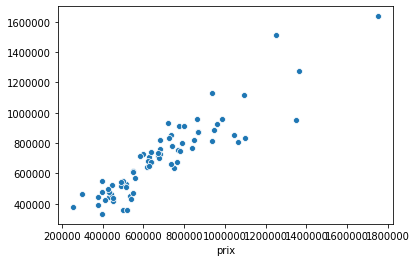

In [20]:
y_valid_pred = model.predict(X_valid)
r2 = r2_score(y_valid, y_valid_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
print(f'r2={r2}\nrmse={rmse}')
sns.scatterplot(y_valid, y_valid_pred);